In [1]:
import os
import requests
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [21]:
url = "https://www.google.com/search?q=wallpaper+lamborghini+urus+car&tbm=isch&hl=en-GB&chips=q:wallpaper+lamborghini+urus+car,online_chips:black+lamborghini:19oCdxTxoHE%3D&rlz=1C1CHBF_enIN1017IN1017&sa=X&ved=2ahUKEwj78bfDwaODAxWav2MGHUSWC9QQ4lYoBXoECAEQPQ&biw=1349&bih=645"  

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

image_tags = soup.find_all('img')

src_list = [img['src'] for img in image_tags if 'src' in img.attrs]
https_links = [link for link in src_list if link.startswith('https://')]

In [22]:
https_links

['https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUTVvM8cb2NS4cmn82prjRQaklNSl6oaKQHhgeTEblrTFM13Yro5zMuus08A&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPpFE4AQSMTycDbQlEl7H9R3ouLTN8cV5JC_kuQ-z7qONy6bdLXX7SINUD9A&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2pd-qYmG7j5Ys0HLHGeYT01wBR9zOPXM-5xXCTtqyr7Kep4PFRl0g6R6eMHg&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSb0U6nrBzvVGfcirJk5Gxq0ZgA-82TTCU3nVcmnVfboqewg-DxdYGOlkob6d0&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7y9SII_8nu9A2srL3E287AV1BSBfaKSHHQWOUq-Cg1JQixkmhQ0DVAJ6fc6k&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ3VOwh_5Y48_v4Sgiz-mFxNzdJ3Q3g8IXBAkdLAX4K_ZibSMRuqkKM6HnRoiY&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKgsPz-piu6BdrIYGemupZMpH-SUZB_PGfVHusRiMCPl0ngrOWklU-FkQI3UY&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-iF2dx9UcpUZiStoYElBI7pkcQULPS6ZQo-Ia0TDX71nEo_EDQAujJT7Pcg&s',
 'https://encrypted-tbn0.gs

In [23]:
image_details = []

if not os.path.exists('images'):
    os.makedirs('images')

for index, url in enumerate(https_links, start=1):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            image_name = f'image{index}.jpg'
            image_path = f'images/{image_name}'
            with open(image_path, 'wb') as file:
                file.write(response.content)
                print(f"Image {index} downloaded successfully.")
                image_details.append({'Image Name': image_name, 'Image Path': image_path})
        else:
            print(f"Failed to download Image {index}. Status code: {response.status_code}")
    except Exception as e:
        print(f"Error downloading Image {index}: {e}")

df_images = pd.DataFrame(image_details)

Image 1 downloaded successfully.
Image 2 downloaded successfully.
Image 3 downloaded successfully.
Image 4 downloaded successfully.
Image 5 downloaded successfully.
Image 6 downloaded successfully.
Image 7 downloaded successfully.
Image 8 downloaded successfully.
Image 9 downloaded successfully.
Image 10 downloaded successfully.
Image 11 downloaded successfully.
Image 12 downloaded successfully.
Image 13 downloaded successfully.
Image 14 downloaded successfully.
Image 15 downloaded successfully.
Image 16 downloaded successfully.
Image 17 downloaded successfully.
Image 18 downloaded successfully.
Image 19 downloaded successfully.


In [24]:
df_images

,Image Name,Image Path
0,image1.jpg,images/image1.jpg
1,image2.jpg,images/image2.jpg
2,image3.jpg,images/image3.jpg
3,image4.jpg,images/image4.jpg
4,image5.jpg,images/image5.jpg
5,image6.jpg,images/image6.jpg
6,image7.jpg,images/image7.jpg
7,image8.jpg,images/image8.jpg
8,image9.jpg,images/image9.jpg
9,image10.jpg,images/image10.jpg


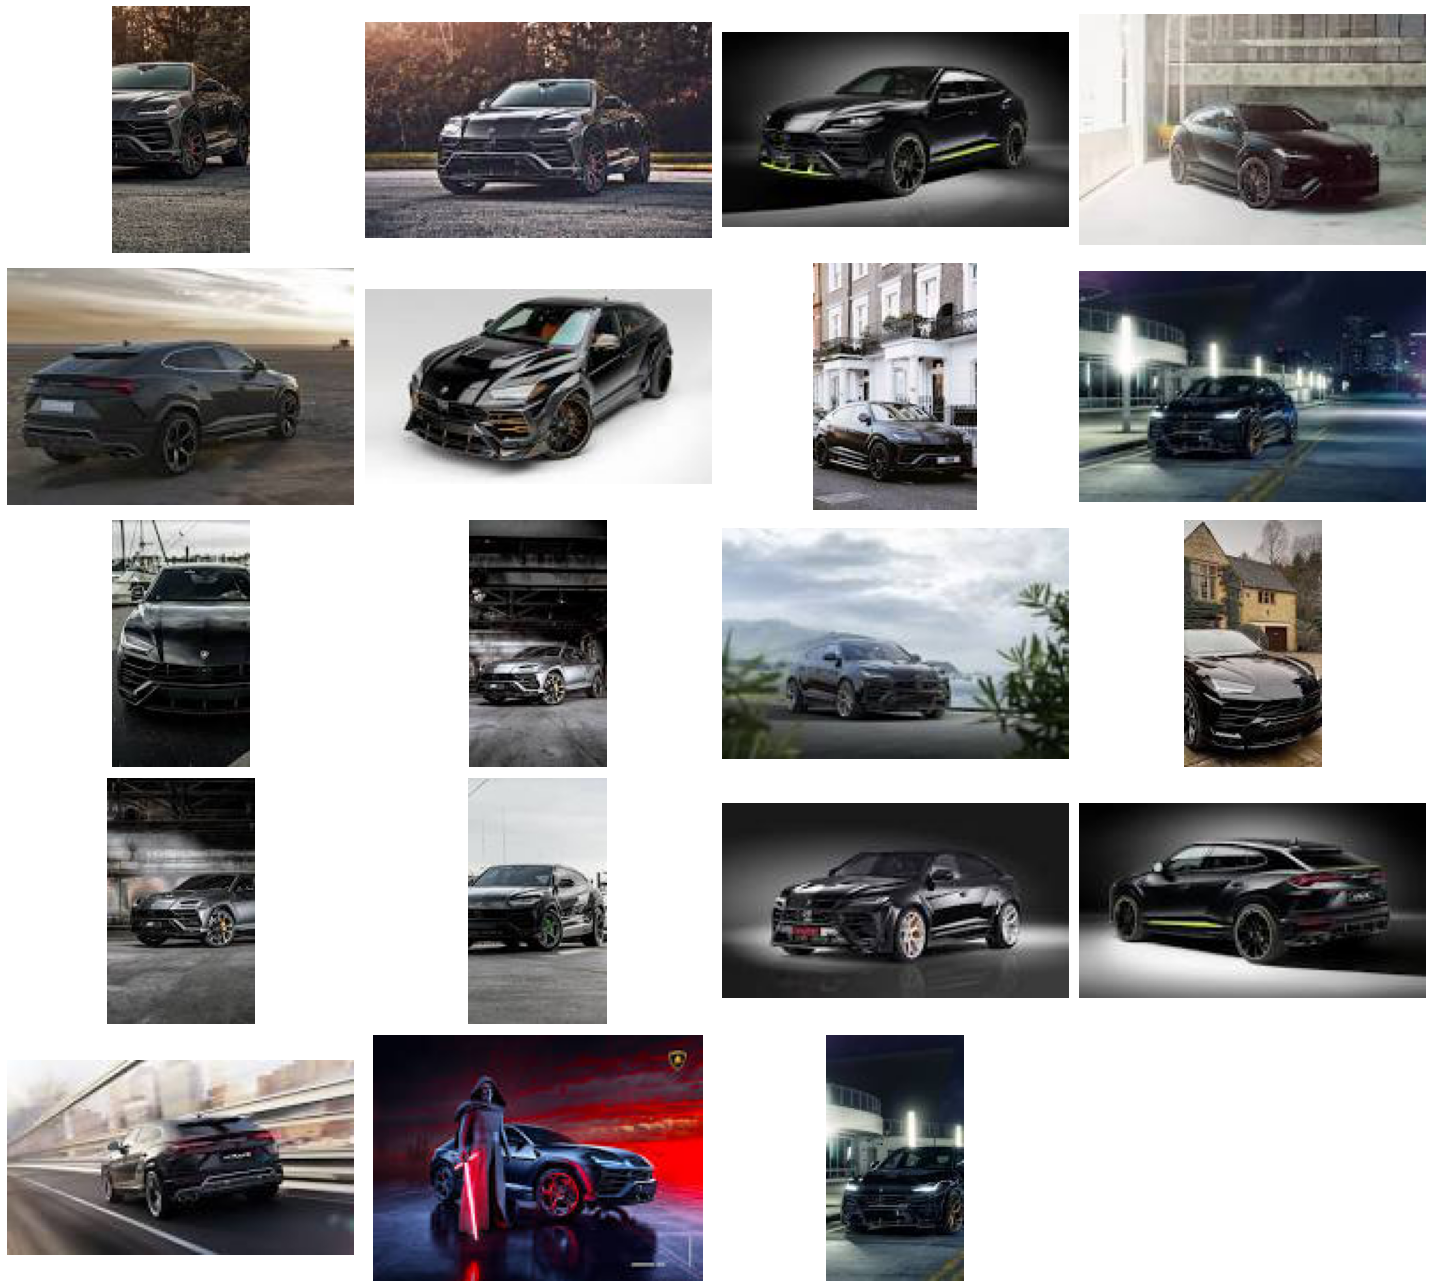

In [25]:
import matplotlib.pyplot as plt
import os

def display_images(image_paths):
    num_images = len(image_paths)
    num_cols = 4 
    num_rows = (num_images - 1) // num_cols + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 18))

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            img = plt.imread(image_paths[i])
            ax.imshow(img)
            ax.axis('off')
        else:
            ax.axis('off')  

    plt.tight_layout()
    plt.show()

image_paths = df_images['Image Path'].tolist()

display_images(image_paths)
